# Project Overview
This project will use data from the National Parks Service to investigate if there are any paterns to the types of plants and animals that become endangered.

Observations include data from Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and Yellowstone National Park.

**Questions To Be Answered**
- Is there a relationship between the park and the number of endangered species?
- Are certain categories of species more likely to be endangered?
- What species are endangered or threatened?

**Data Overview**

*observations.csv*

Contains the number of observations of each species in each park.
- Columns: ['scientific_name', 'park_name', 'observations']
- park_name: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

*species_info.csv*

Contains information about the spieces including category, names, and conservation status.
- Columns: ['category', 'scientific_name', 'common_names', 'conservation_status']
- category: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
- conservation_status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Python Code

**Set up Python imports.**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Set up and check dataframes.**
1. Load data.
2. Check dataframe shape and column names.
3. Check what data values are present in the dataframe.

In [2]:
# Load data
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

# Check shape and columns of the dataframe
print(obs.shape)
print(obs.columns.tolist())
print(obs.head())
print()
print(species.shape)
print(species.columns.tolist())
print(species.head())

(23296, 3)
['scientific_name', 'park_name', 'observations']
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

(5824, 4)
['category', 'scientific_name', 'common_names', 'conservation_status']
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's R

In [3]:
# Check what data values are present in the dataframe
data = species.scientific_name.unique()
print(data.shape)
print(data)

(5541,)
['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']


**Join dataframes.**

In [4]:
obs = pd.merge(obs,species,on='scientific_name')
print(obs.head())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


**Divide data by park.**

In [5]:
GSM = obs.loc[obs['park_name']=='Great Smoky Mountains National Park']
YOS = obs.loc[obs['park_name']=='Yosemite National Park']
BRY = obs.loc[obs['park_name']=='Bryce National Park']
YEL = obs.loc[obs['park_name']=='Yellowstone National Park']

print(BRY.head())

                        scientific_name            park_name  observations  \
3                  Abutilon theophrasti  Bryce National Park            84   
10  Ludwigia peploides ssp. glabrescens  Bryce National Park           103   
11                Cistothorus platensis  Bryce National Park           114   
12         Setaria viridis var. viridis  Bryce National Park           101   
21                       Carduus nutans  Bryce National Park            83   

          category             common_names conservation_status  
3   Vascular Plant               Velvetleaf                 NaN  
10  Vascular Plant  Floating Primrosewillow                 NaN  
11            Bird               Sedge Wren                 NaN  
12  Vascular Plant       Green Bristlegrass                 NaN  
21  Vascular Plant             Musk Thistle                 NaN  


**Plot bar graph of species per conservation status for a park.**

In [6]:
def plotConservationStatusCounts (data,label):
    status = ['In Recovery','Species of Concern','Threatened','Endangered']
    counts = data['conservation_status'].value_counts().reindex(status, fill_value=0)
    #print(counts)
    colors = ['b','y','orange','r']
    bars = plt.bar(status,counts,color=colors)
    plt.title('Conservation statuses in ' + label)
    plt.xlabel('Conservation Status')
    plt.ylabel('Number of species')
    plt.bar_label(bars)

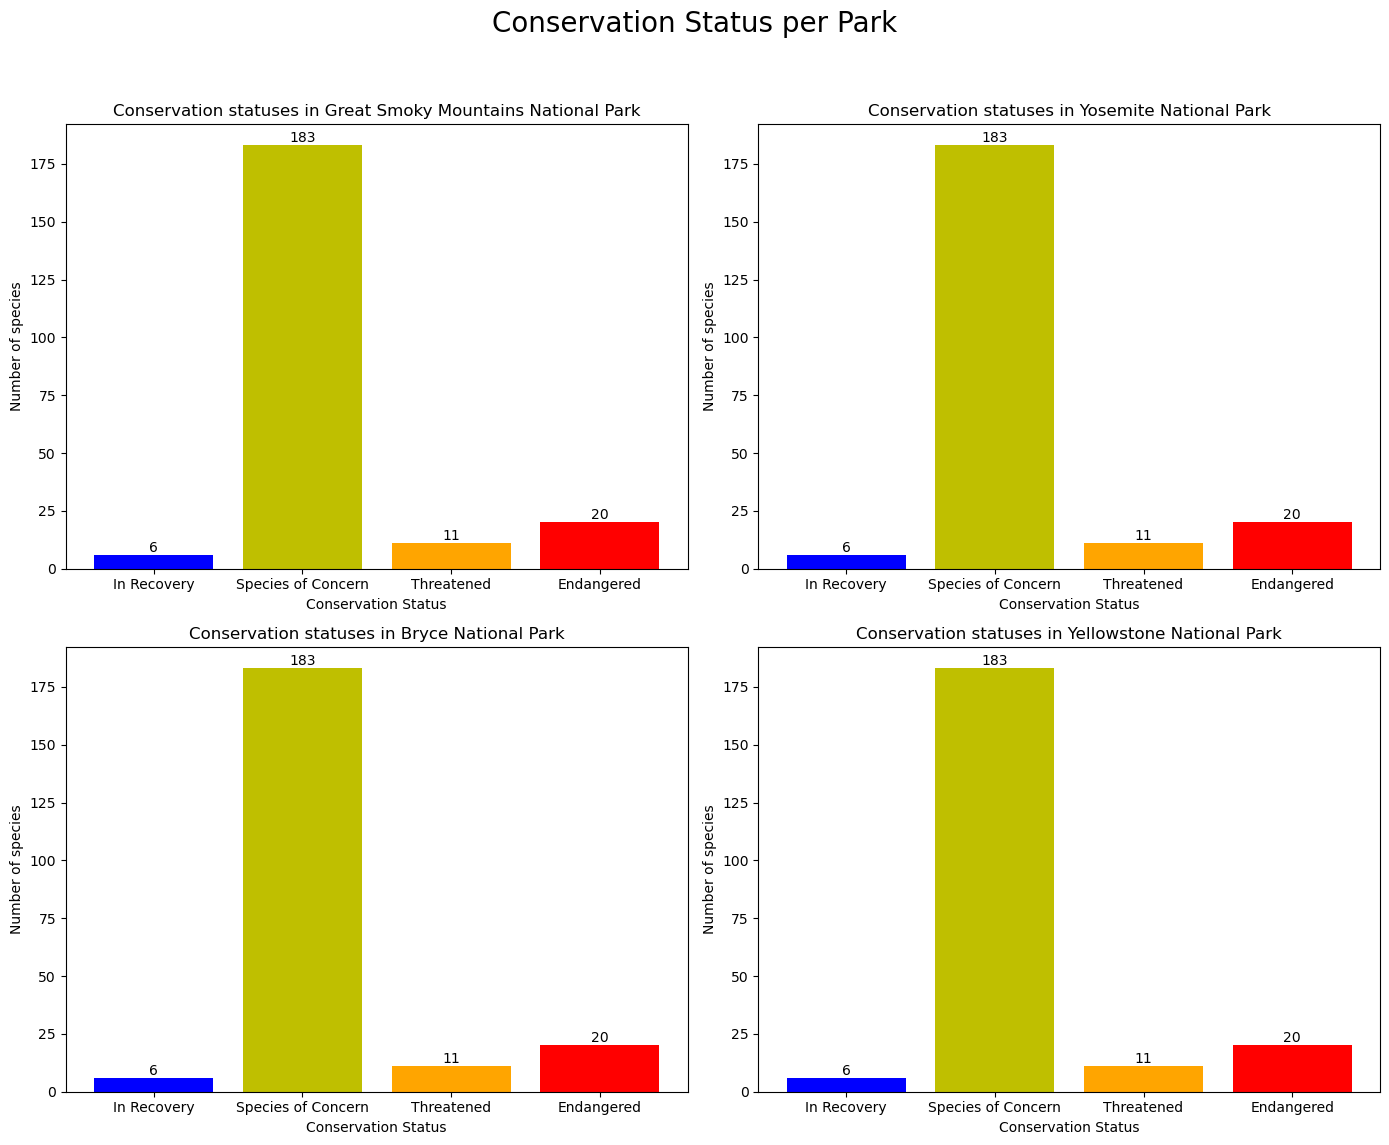

In [7]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plotConservationStatusCounts(GSM,'Great Smoky Mountains National Park')
plt.subplot(2,2,2)
plotConservationStatusCounts(YOS,'Yosemite National Park')
plt.subplot(2,2,3)
plotConservationStatusCounts(BRY,'Bryce National Park')
plt.subplot(2,2,4)
plotConservationStatusCounts(YEL,'Yellowstone National Park')

plt.suptitle('Conservation Status per Park',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Divide data by category.**

In [8]:
mam = obs.loc[obs['category']=='Mammal']
bird = obs.loc[obs['category']=='Bird']
rep = obs.loc[obs['category']=='Reptile']
amp = obs.loc[obs['category']=='Amphibian']
fish = obs.loc[obs['category']=='Fish']
vasPla = obs.loc[obs['category']=='Vascular Plant']
nonvasPla = obs.loc[obs['category']=='Nonvascular Plant']

print(mam.head())

           scientific_name                            park_name  observations  \
1           Neovison vison  Great Smoky Mountains National Park            77   
70      Blarina brevicauda                  Bryce National Park            77   
80  Odocoileus virginianus  Great Smoky Mountains National Park            36   
81  Odocoileus virginianus  Great Smoky Mountains National Park            36   
86           Puma concolor                  Bryce National Park            92   

   category                                       common_names  \
1    Mammal                                      American Mink   
70   Mammal  Northern Short Tailed Shrew, Northern Short-Ta...   
80   Mammal                                  White-Tailed Deer   
81   Mammal               White-Tailed Deer, White-Tailed Deer   
86   Mammal                            Panther (Mountain Lion)   

   conservation_status  
1                  NaN  
70                 NaN  
80                 NaN  
81              

**Plot bar graph of species per conservation status for each category.**

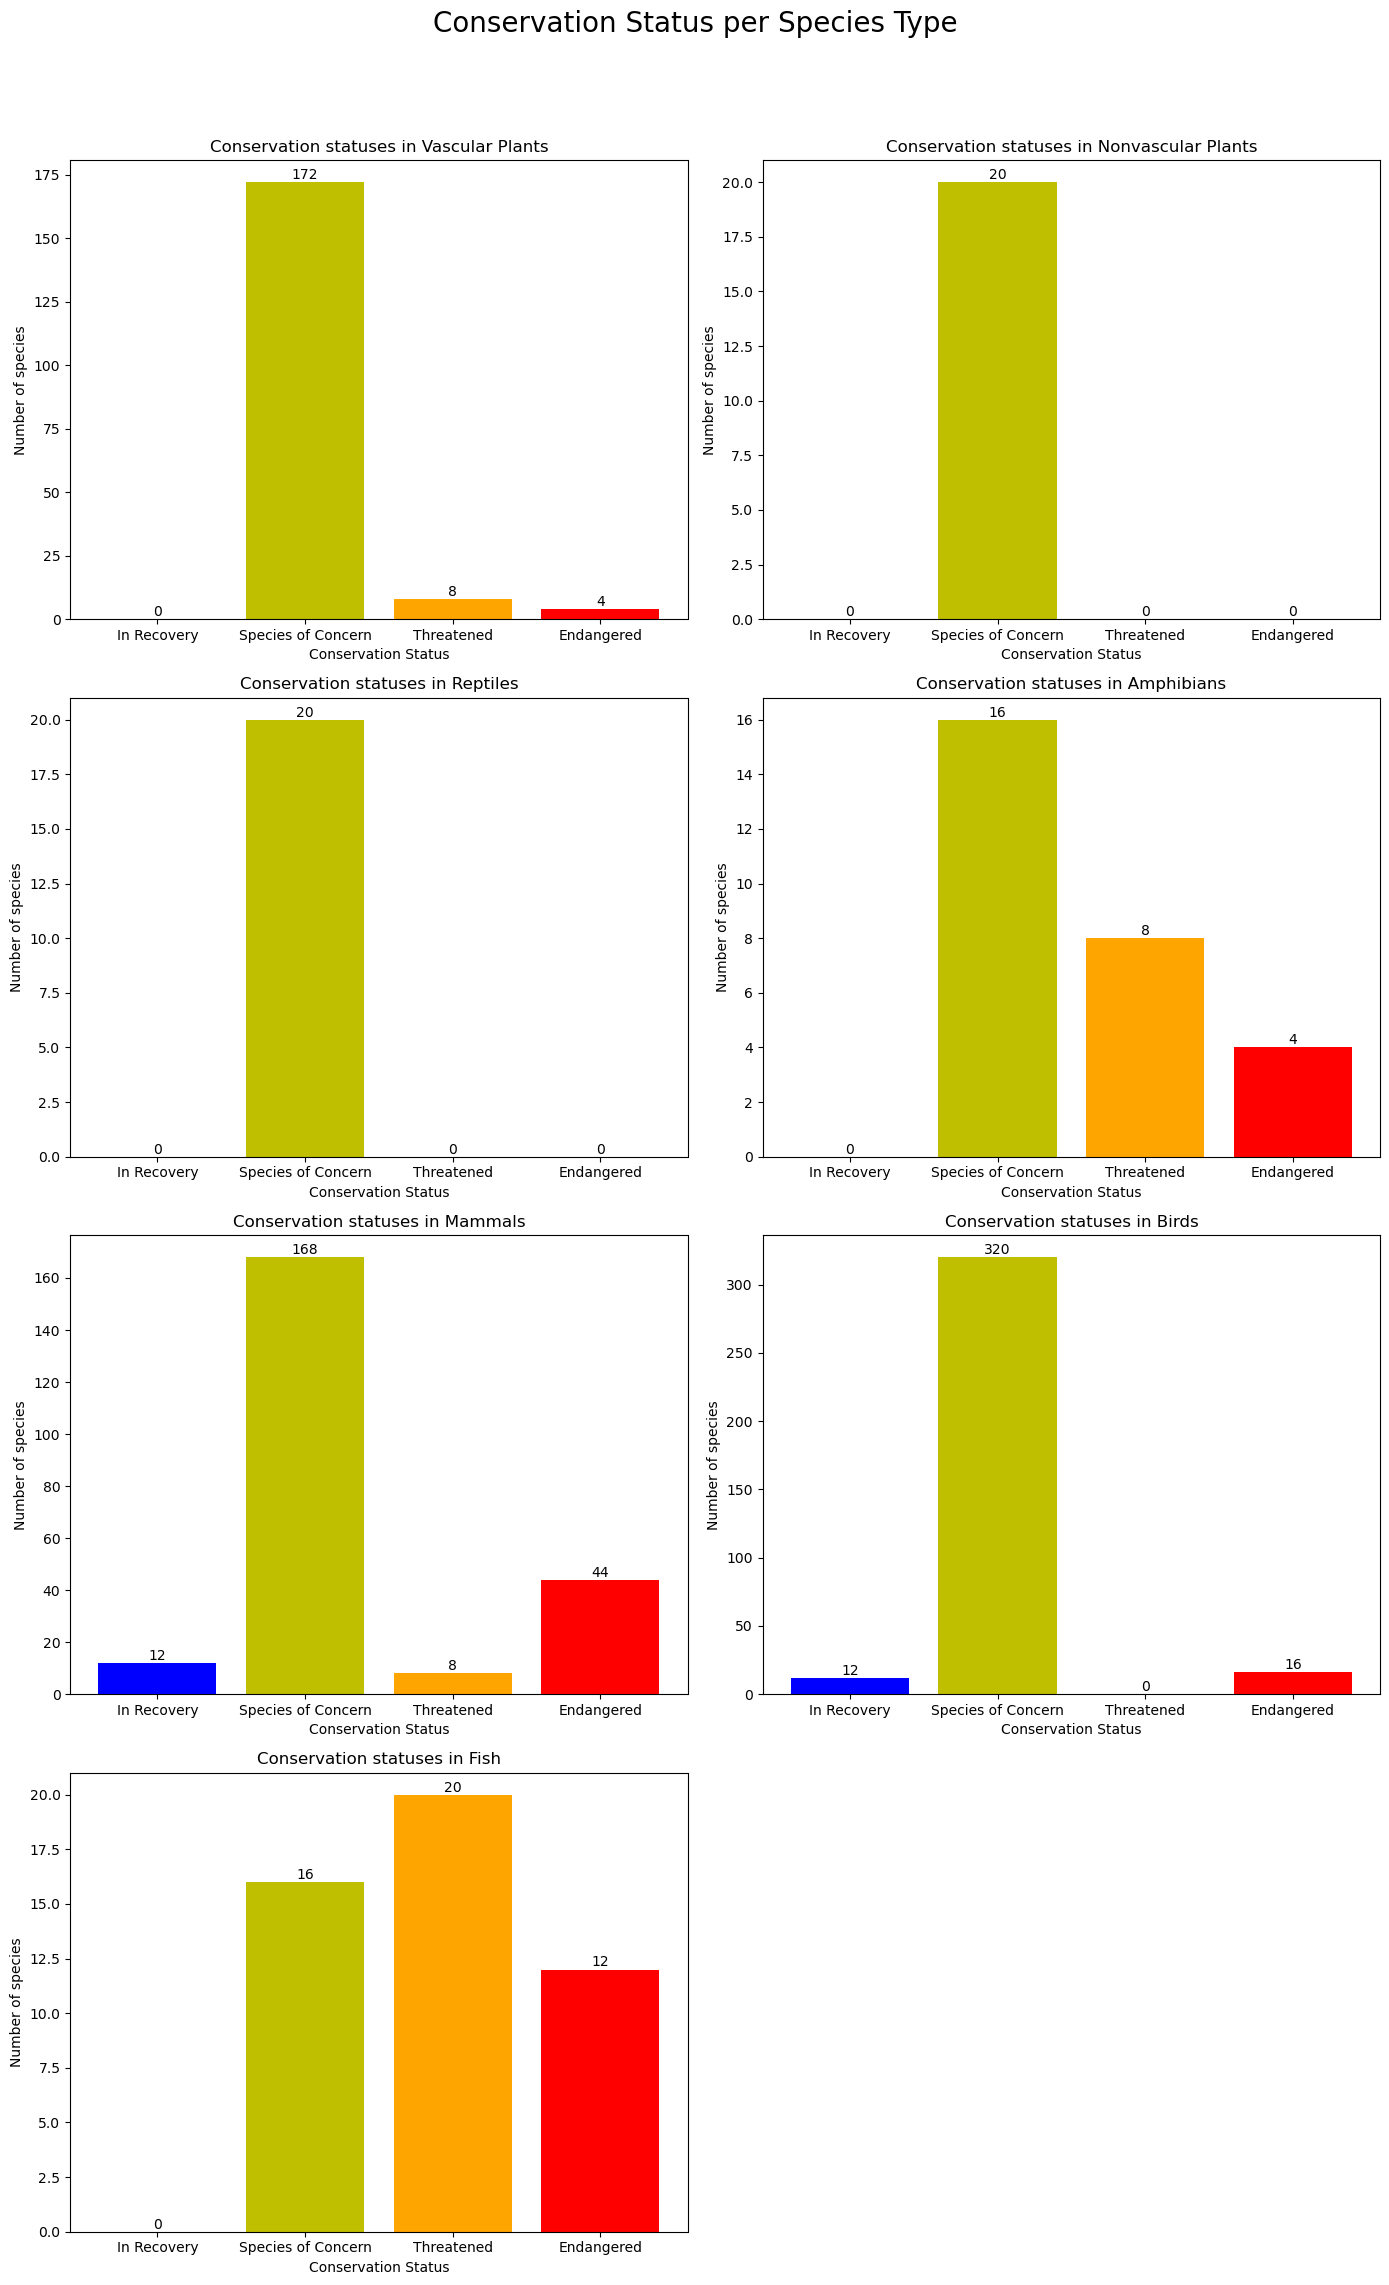

In [9]:
plt.figure(figsize=(14,24))
plt.subplot(4,2,1)
plotConservationStatusCounts(vasPla,'Vascular Plants')
plt.subplot(4,2,2)
plotConservationStatusCounts(nonvasPla,'Nonvascular Plants')
plt.subplot(4,2,3)
plotConservationStatusCounts(rep,'Reptiles')
plt.subplot(4,2,4)
plotConservationStatusCounts(amp,'Amphibians')
plt.subplot(4,2,5)
plotConservationStatusCounts(mam,'Mammals')
plt.subplot(4,2,6)
plotConservationStatusCounts(bird,'Birds')
plt.subplot(4,2,7)
plotConservationStatusCounts(fish,'Fish')

plt.suptitle('Conservation Status per Species Type',fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Determine which animals are endangered.**

In [ ]:
end = obs.loc[obs['conservation_status']=='Endangered']

#counts = end['common_names'].value_counts()
counts = end['common_names'].unique()
print(counts)

['Red-Cockaded Woodpecker' 'Sierra Nevada Yellow-Legged Frog' 'Red Wolf'
 'Duskytail Darter' 'Gray Wolf' 'Gray Wolf, Wolf' 'Gray Myotis'
 'Mountain Avens, Spreading Avens' 'June Sucker' 'Smoky Madtom'
 "Bachman's Warbler, Bachman's Wood Warbler" 'Sierra Nevada Bighorn Sheep'
 'California Condor'
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel'
 'Indiana Bat, Indiana Or Social Myotis' 'Whooping Crane']


**Determine which animals are threatened.**

In [29]:
thr = obs.loc[obs['conservation_status']=='Threatened']

#counts = end['common_names'].value_counts()
counts = thr['common_names'].unique()
print(counts)

['Rainbow Trout' 'California Red-Legged Frog' 'Yosemite Toad'
 'Northern Long-Eared Bat, Northern Myotis' 'Small Whorled Pogonia'
 'Spotfin Chub' 'Virginia Spiraea' 'Lahontan Cutthroat Trout'
 'Grizzly Bear' 'Yellowfin Madtom']


# Conclusions

**Relationship between parks and number of endangered species.**

As seen in the figure below, the provided data includes the same distirbution of species based on conservation status. This is likely due to the sample that was choosen and may not be accurate to the park populations as a whole.

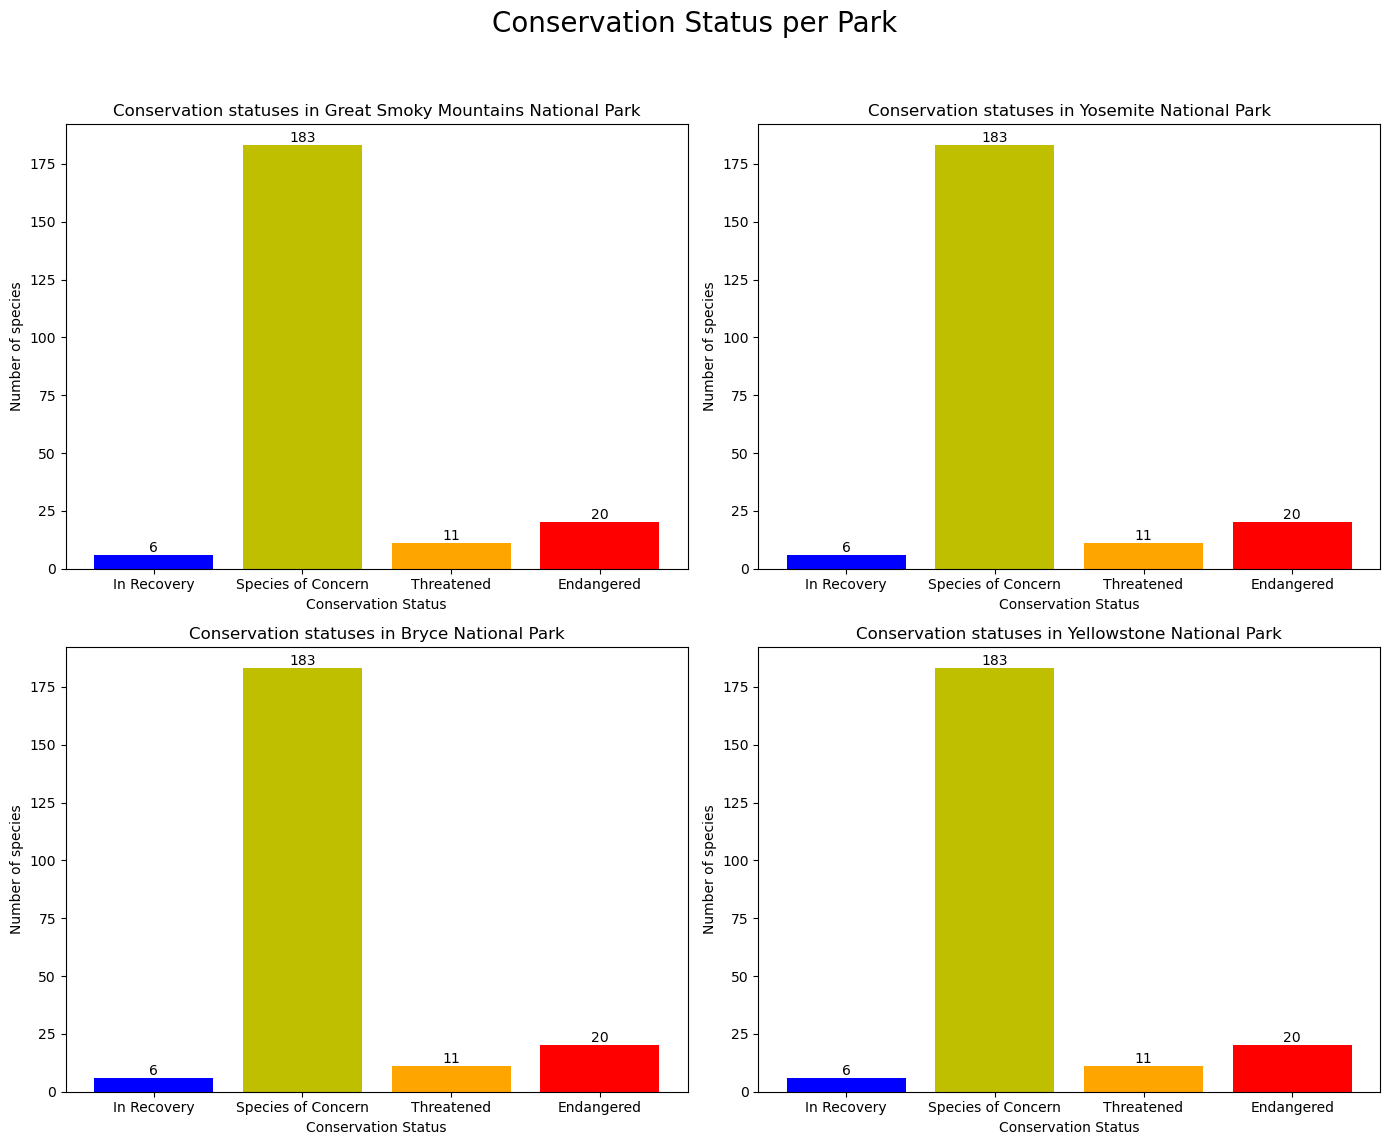

**Endangered status based on species category.**

As seen in the figure below, the number of scpecies in each conservation status varies based on the species category.

Some things to note:
- Mammals have the most endangered species.
- Fish have the most threatened species.
- Reptiles and non-vascular plants are at the least risk.
- Based on the sum of threatened and endangered species, fish and mammals are at the greatest risk.

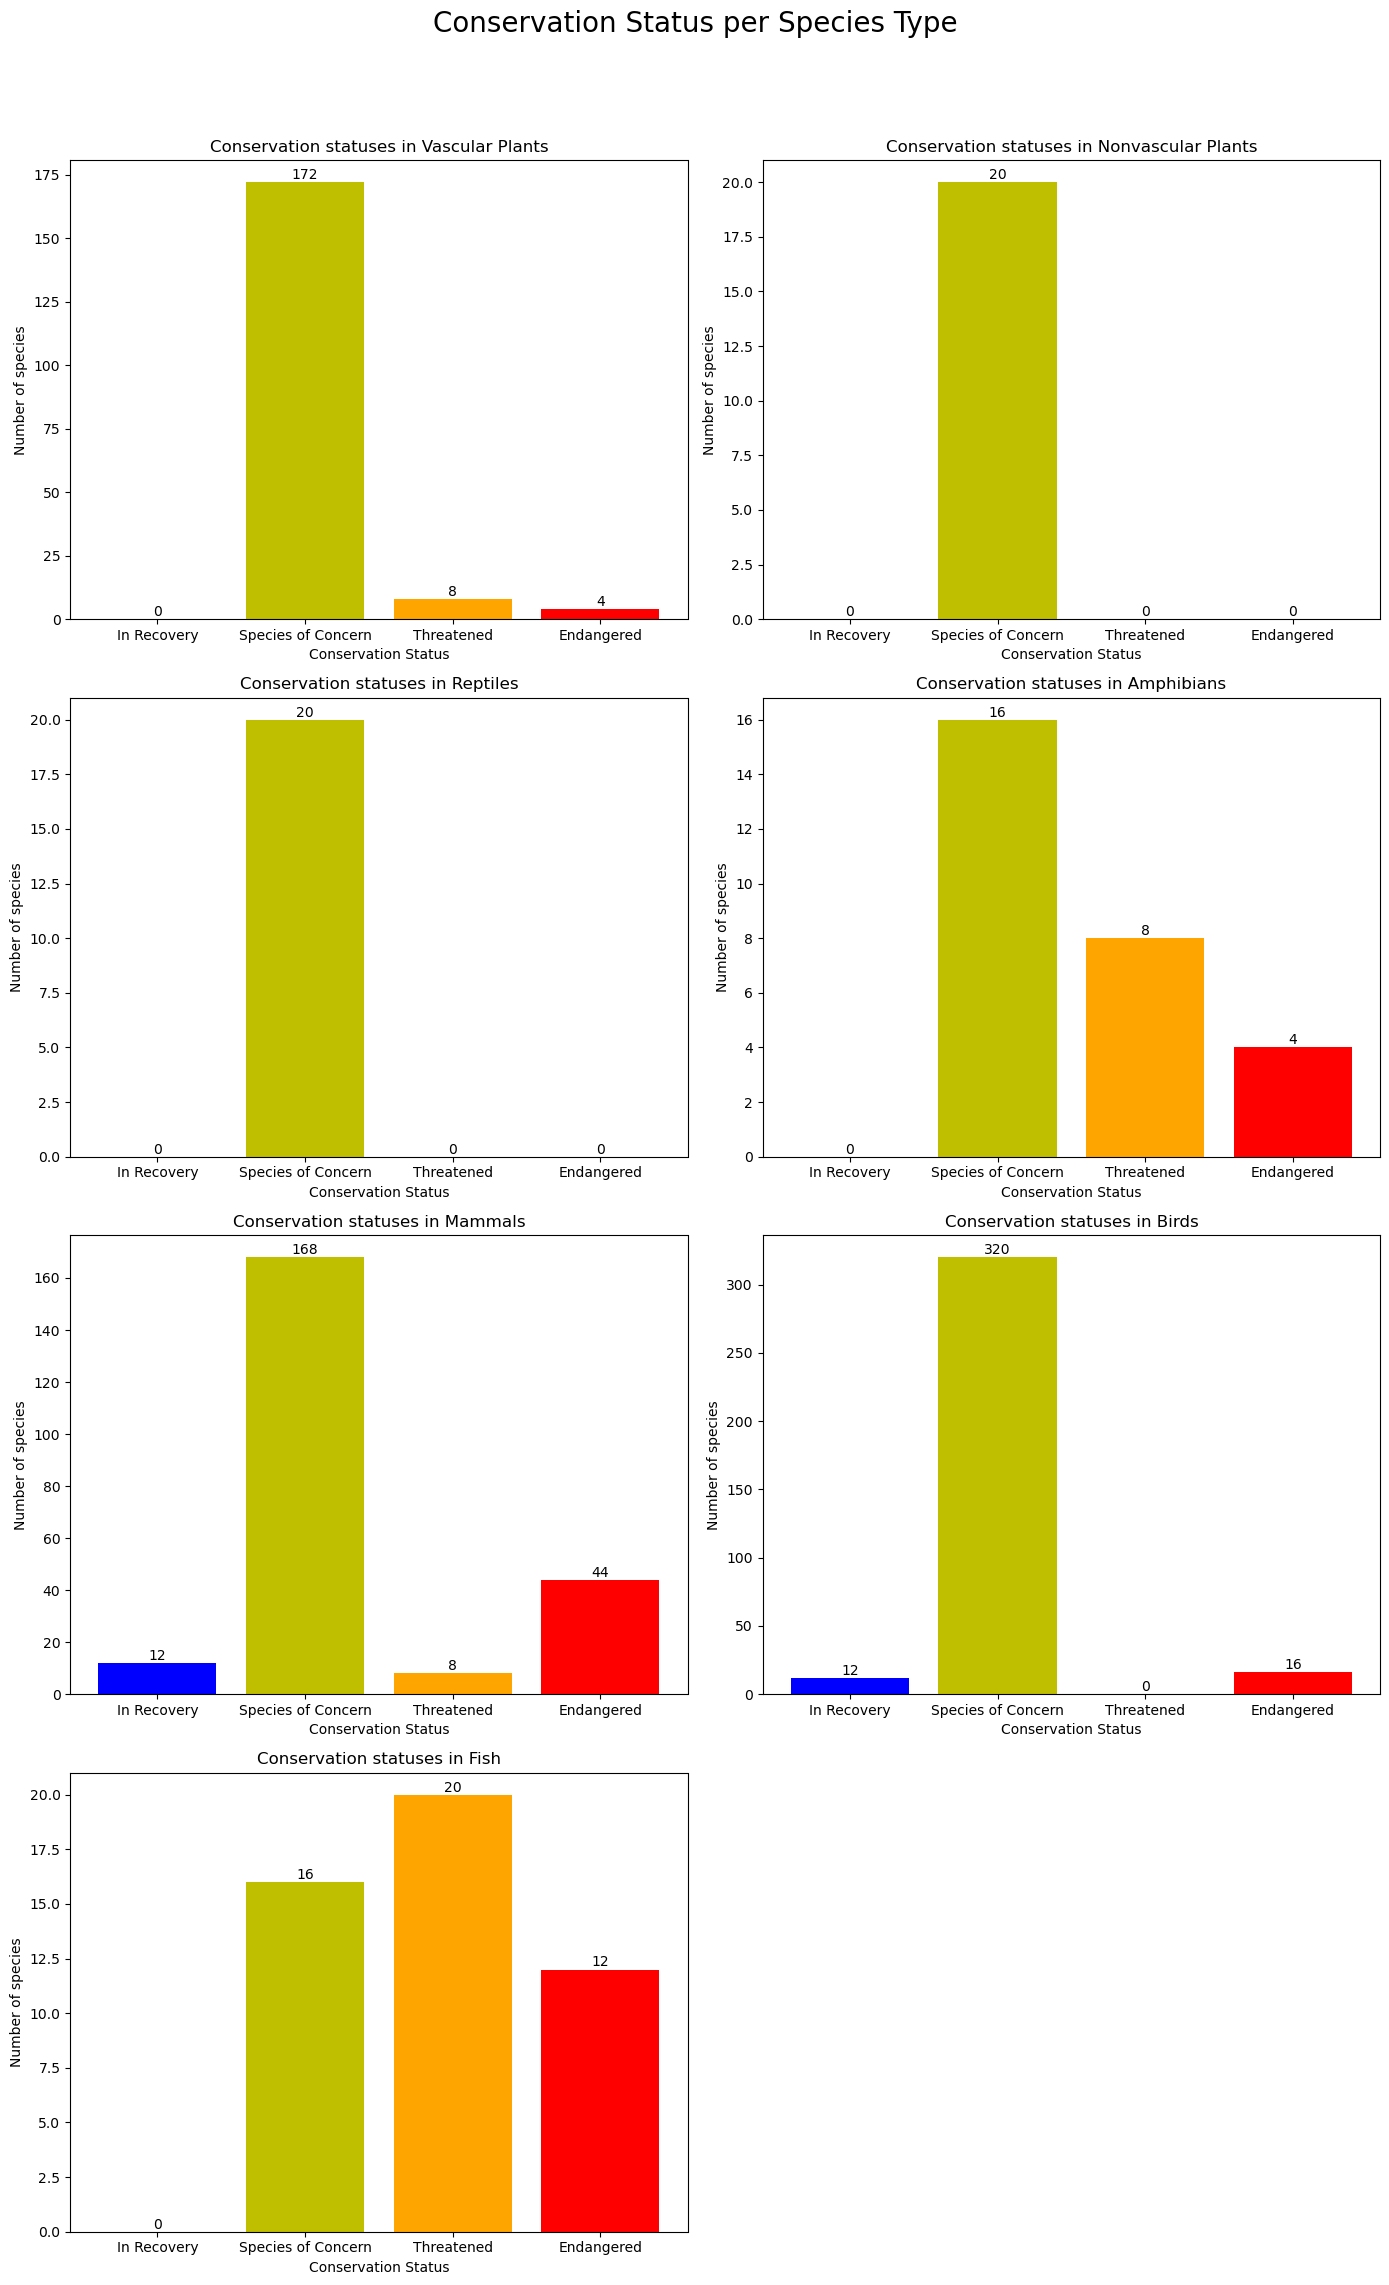

**Endangered and threatened species.**

*Endangered species from this data:*
- Red-Cockaded Woodpecker
- Sierra Nevada Yellow-Legged Frog
- Red Wolf
- Duskytail Darter
- Gray Wolf
- Gray Myotis
- Mountain Avens, Spreading Avens
- June Sucker
- Smoky Madtom
- Bachman's Warbler, Bachman's Wood Warbler
- Sierra Nevada Bighorn Sheep
- California Condor
- Carolina Northern Flying Squirrel, Northern Flying Squirrel
- Indiana Bat, Indiana Or Social Myotis
- Whooping Crane

*Threatened species from this data:*
- Rainbow Trout
- California Red-Legged Frog
- Yosemite Toad
- Northern Long-Eared Bat, Northern Myotis
- Small Whorled Pogonia
- Spotfin Chub
- Virginia Spiraea
- Lahontan Cutthroat Trout
- Grizzly Bear
- Yellowfin Madtom
